# import/mounts

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [80]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [81]:
data = "/content/drive/My Drive/Coursework/adult.csv"

# Load in data
df = pd.read_csv(data)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [82]:
df.info

<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marr

In [83]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Duplicates found, drop them

In [84]:
# Drop duplicates
df = df.drop_duplicates()
# Obtain the sum of duplicated to confirm all have been dropped
df.duplicated().sum()

0

In [85]:
df = df.drop(columns = ['fnlwgt'])

In [86]:
df.value_counts('native-country')

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [87]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [88]:
df.info

<bound method DataFrame.info of        age     workclass     education  educational-num      marital-status  \
0       25       Private          11th                7       Never-married   
1       38       Private       HS-grad                9  Married-civ-spouse   
2       28     Local-gov    Assoc-acdm               12  Married-civ-spouse   
3       44       Private  Some-college               10  Married-civ-spouse   
4       18             ?  Some-college               10       Never-married   
...    ...           ...           ...              ...                 ...   
48837   27       Private    Assoc-acdm               12  Married-civ-spouse   
48838   40       Private       HS-grad                9  Married-civ-spouse   
48839   58       Private       HS-grad                9             Widowed   
48840   22       Private       HS-grad                9       Never-married   
48841   52  Self-emp-inc       HS-grad                9  Married-civ-spouse   

              occup

In [89]:
# Find correlations
corr = df.corr()
corr.round(2)

<ipython-input-89-5b5da7b4f2fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.00,0.03,0.08,0.06,0.07
educational-num,0.03,1.00,0.13,0.08,0.14
capital-gain,0.08,0.13,1.00,-0.03,0.08
capital-loss,0.06,0.08,-0.03,1.00,0.05
hours-per-week,0.07,0.14,0.08,0.05,1.00


# Correlation map / Visuals

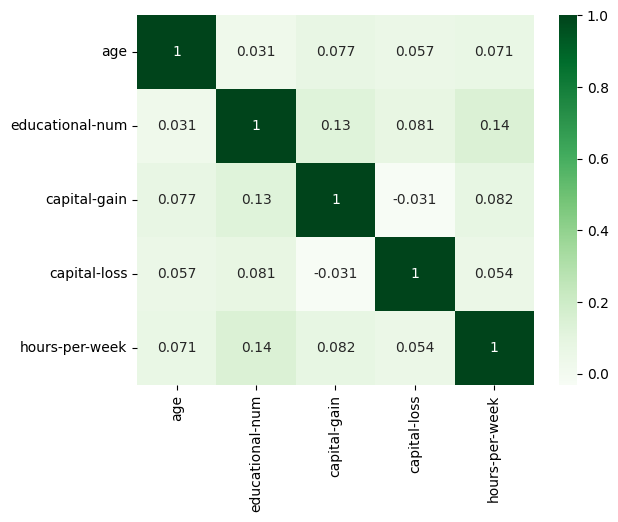

In [90]:
# Make a heatmap using the correlations from above
sns.heatmap(corr, cmap = 'Greens', annot = True);

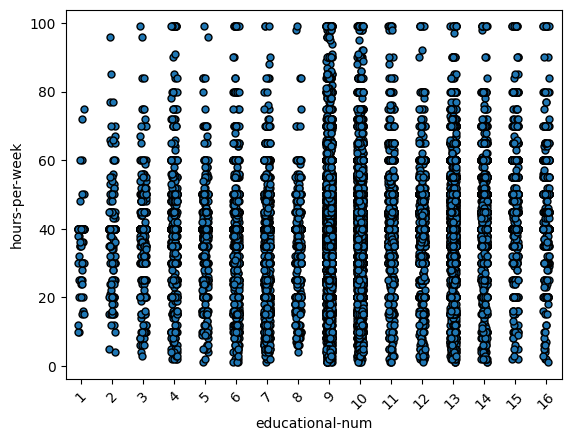

In [91]:
import seaborn as sns
ax = sns.stripplot(data=df, x='educational-num', y='hours-per-week', edgecolor='black', linewidth=1)
ax.tick_params(axis='x', rotation=45)

The visualization shown above demonstrates a slight decrease in higher hours worked with further education compared to those with 9-10 years averaging the most hours worked

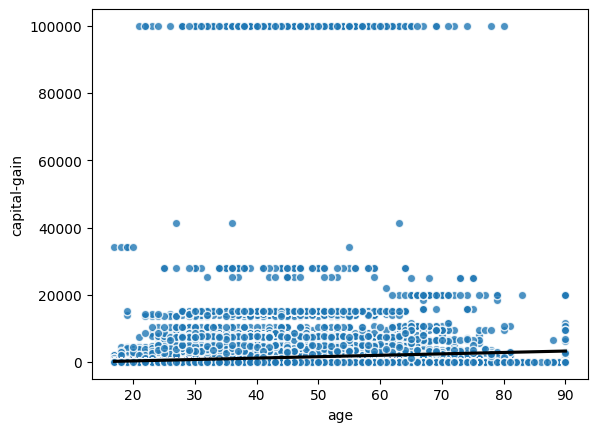

In [92]:
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data=df, x='age', y="capital-gain",
                 line_kws=line_kws, scatter_kws=scatter_kws);

As expected from above we see a weak positive trend between progressing in age and capital gains

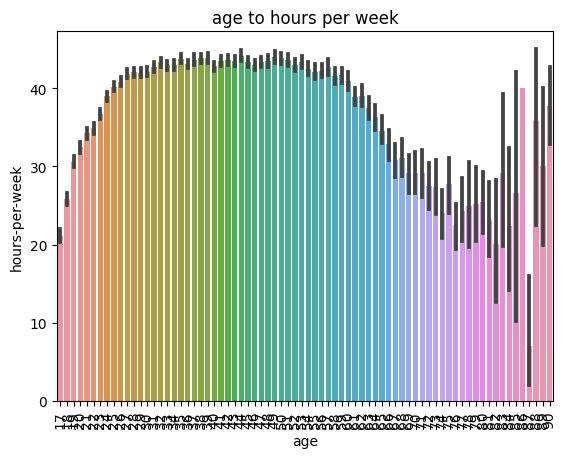

In [93]:
ax = sns.barplot(data=df, x='age', y='hours-per-week',  )
ax.set_title('age to hours per week')
ax.set_ylabel('hours-per-week')
ax.set_xlabel('age')
ax.tick_params(axis='x', rotation=90)

Here we see that peak hours start at about 30 and don't begin to taper off until roughly 60 when people begin to retire

<ipython-input-94-d7a0dcd2dc70>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x='educational-num', y='capital-loss',palette="deep")


Text(0.5, 0, 'education')

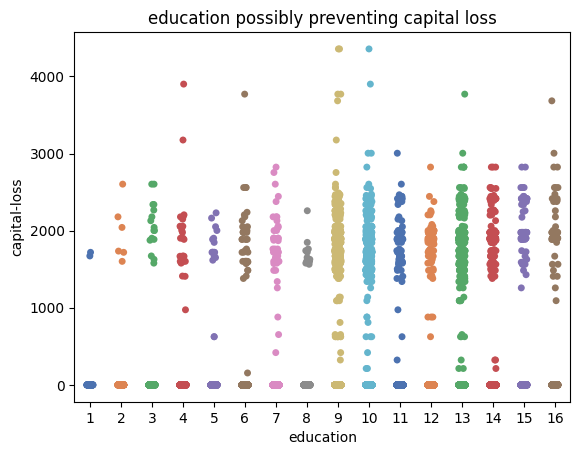

In [94]:
ax = sns.stripplot(data=df, x='educational-num', y='capital-loss',palette="deep")
ax.set_title('education possibly preventing capital loss')
ax.set_ylabel('capital-loss')
ax.set_xlabel('education')

Here we see the majority of capital loss cases happen to those with 9-12 years of education